<a href="https://colab.research.google.com/github/Nagu34/CSEE5590_Python_DL/blob/master/Lab_Assignment_3/lab3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())
import tensorflow as tf
import datetime
import warnings
warnings.filterwarnings('ignore')
%load_ext tensorboard

['.config', 'drive', 'logs', 'sample_data']


In [3]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0-dev20190427


In [0]:
dataset = pd.read_csv("./drive/My Drive/Colab Notebooks/heart.csv")

In [5]:
dataset.shape

(303, 14)

In [6]:
dataset.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [7]:
dataset.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


1    165
0    138
Name: target, dtype: int64


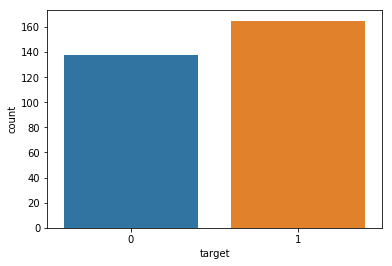

In [9]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [10]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


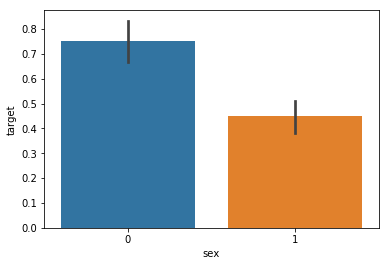

In [11]:
sns.barplot(dataset["sex"],y)

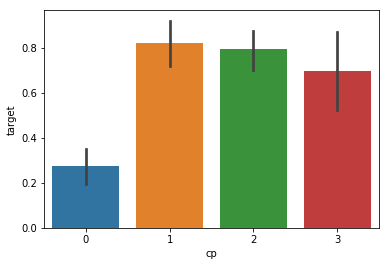

In [12]:
sns.barplot(dataset["cp"],y)

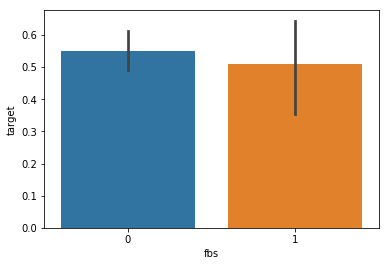

In [13]:
sns.barplot(dataset["fbs"],y)

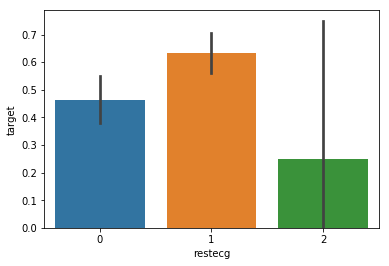

In [14]:
sns.barplot(dataset["restecg"],y)

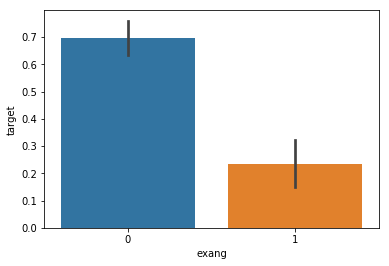

In [15]:
sns.barplot(dataset["exang"],y)

In [0]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [18]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
def build_model(EPOCHS):
  model = keras.Sequential([layers.Dense(11,activation='relu',input_dim=13),
  layers.Dense(32,activation='relu'),
  layers.Dense(1,activation='sigmoid')])
  learning_rate = 0.01
  decay_rate = learning_rate / EPOCHS
  momentum = 0.8
  sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
  model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['mean_absolute_error','mean_squared_error'])
  return model

In [0]:
model = build_model(EPOCHS = 100)

In [22]:
%tensorboard --logdir logs/new_fit1

In [50]:
import datetime
!rm -R ./logs/ # rf
log_dir="logs/new_fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#validation_data=(normed_test_data,test_labels)
model.fit(X_train,Y_train,
  epochs=100,validation_split=0.2, verbose=0,
  callbacks=[tensorboard_callback])

In [0]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [0]:
def build_model(EPOCHS):
  model = keras.Sequential([layers.Dense(11,activation='relu',input_dim=13),
  layers.Dense(64,activation='relu'),
  layers.Dense(32,activation='relu'),
  layers.Dense(1,activation='sigmoid')])
  learning_rate = 0.01
  decay_rate = learning_rate / EPOCHS
  momentum = 0.8
  sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
  model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['mean_absolute_error','mean_squared_error'])
  return model

In [0]:
model = build_model(EPOCHS = 100)

In [59]:
import datetime
#!rm -R ./logs/ # rf
log_dir="logs/new_fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#validation_data=(normed_test_data,test_labels)
model.fit(X_train_std,Y_train,
  epochs=100,validation_data=(X_test_std,Y_test), verbose=0,
  callbacks=[tensorboard_callback])

In [0]:
def build_model(EPOCHS):
  model = keras.Sequential([layers.Dense(11,activation='relu',input_dim=13),
  layers.Dense(64,activation='relu'),
  layers.Dense(32,activation='relu'),
  layers.Dense(1,activation='sigmoid')])
  learning_rate = 0.01
  decay_rate = learning_rate / EPOCHS
  momentum = 0.8
  sgd = tf.keras.optimizers.RMSprop(lr=learning_rate, momentum=momentum, decay=decay_rate)
  model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
  return model

In [0]:
model = build_model(EPOCHS = 100)

In [64]:
import datetime
#!rm -R ./logs/ # rf
log_dir="logs/new_fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#validation_data=(normed_test_data,test_labels)
model.fit(X_train_std,Y_train,
  epochs=100,validation_data=(X_test_std,Y_test), verbose=0,
  callbacks=[tensorboard_callback])

In [0]:
def build_model(EPOCHS):
  model = keras.Sequential([layers.Dense(11,activation='relu',input_dim=13),
  layers.Dense(64,activation='relu'),
  layers.Dense(32,activation='tanh'),
  layers.Dense(1,activation='sigmoid')])
  learning_rate = 0.1
  decay_rate = learning_rate / EPOCHS
  momentum = 0.8
  sgd = tf.keras.optimizers.Adam(lr=learning_rate,decay=decay_rate)
  model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
  return model

In [0]:
model = build_model(EPOCHS = 100)

In [69]:
import datetime
#!rm -R ./logs/ # rf
log_dir="logs/new_fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#validation_data=(normed_test_data,test_labels)
model.fit(X_train_std,Y_train,
  epochs=100,validation_data=(X_test_std,Y_test), verbose=0,
  callbacks=[tensorboard_callback])